# Determining forest cover type based on cartographic variables using classification

-----

## Frame the problem

### Problem
Predicting forest cover type can aid in advancing classifying and mapping forests

### Target & feature variables
target variable: cover type

feature variables: elevation, aspect, slope, horizontal distance to hydrology, veritcal distance to hydrology, distance to roadways, hillsade at 9am, hillshade at 12pm, hillshade at 3pm, distance to fire points, wilderness areas, soil types

### Goals and success metrics
Goal: to predict the forest cover type based on feature variables

### Risks or limitations
* there are many factors that influence forest cover type
* Specific to Colorado tree species and only 7 tree species
* There may be other accurate ways to determine forest cover type, like using remote sensing images

### Data Sources
Forest type mapping data set information from: http://archive.ics.uci.edu/ml/datasets/Covertype
data from: http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
data set description from: http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info 

----

## Reading in and clean the data

In [2]:
import pandas as pd
import gzip
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', 100)

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"

In [4]:
df = pd.read_csv(url, header=None,compression="gzip")

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [6]:
#create column names
df.columns = ["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon", "Hillshade_3pm","Horizontal_Distance_To_Fire_Points",
             "Rawah Wilderness Area", "Neota Wilderness Area", "Comanche Peak Wilderness Area", "Cache la Poudre Wilderness Area", 
              "soil_type1","soil_type2", "soil_type3", "soil_type4", "soil_type5", "soil_type6", "soil_type7", "soil_type8", "soil_type9", 
              "soil_type10", "soil_type11","soil_type12", "soil_type13", "soil_type14", "soil_type15", "soil_type16", "soil_type17", "soil_type18", "soil_type19", "soil_type20", 
              "soil_type21","soil_type22", "soil_type23", "soil_type24", "soil_type25", "soil_type26", "soil_type27", "soil_type28", "soil_type29", "soil_type30",
              "soil_type31","soil_type32", "soil_type33", "soil_type34", "soil_type35", "soil_type36", "soil_type37", "soil_type38", "soil_type39", "soil_type40",
              "cover_type"]

In [7]:
df.drop(["Rawah Wilderness Area", "Neota Wilderness Area", "Comanche Peak Wilderness Area", "Cache la Poudre Wilderness Area"], axis=1, inplace=True)

In [8]:
df.shape

(581012, 51)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 51 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  soil_type1                          581012 non-null  int64
 11  soil_type2                          581012 non-null 

In [53]:
df.isna().any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
soil_type1                            False
soil_type2                            False
soil_type3                            False
soil_type4                            False
soil_type5                            False
soil_type6                            False
soil_type7                            False
soil_type8                            False
soil_type9                            False
soil_type10                           False
soil_type11                           False
soil_type12                           False
soil_type13                     

---

## First pass train test split

In [108]:
df_subset = df.sample(frac=0.25, replace=False, random_state=1)
df_subset

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
376969,2949,101,21,693,151,3009,250,206,74,595,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
59897,3198,156,10,510,23,3900,232,241,140,4221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
247100,2199,2,18,323,78,540,193,204,147,150,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
111532,2851,111,14,150,27,2394,243,224,107,2290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
522294,2920,47,21,335,119,2292,222,189,92,2059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331831,2505,315,14,60,2,234,183,228,185,684,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
112096,2926,189,7,170,10,5010,221,246,160,1917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
254927,2232,72,35,331,-57,607,234,150,0,467,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
564267,2705,30,26,190,32,1806,202,174,95,2042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [109]:
# Split the data into the column `y` we want to predict and the
# columns `X` we will use to make the predictions
X = df_subset.drop("cover_type", axis=1)
y = df_subset.loc[:, "cover_type"]

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [112]:
# Import a model class
from sklearn.linear_model import LogisticRegression

# Create a model from that class
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

# Ask the model to learn a function that predicts `y` from `X`
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [113]:
# Score the model on the test data
print(lr.score(X_test, y_test))
print(lr.score(X_train,y_train))

0.6877237429090709
0.6861821753458357


In [115]:
print(y_test.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))

2    0.487581
1    0.364460
3    0.061464
7    0.034284
6    0.031393
5    0.016247
4    0.004571
Name: cover_type, dtype: float64
2    0.487199
1    0.364442
3    0.062209
7    0.035580
6    0.029631
5    0.016174
4    0.004764
Name: cover_type, dtype: float64


#### What does this all mean?

- My model gets the right answer 68% of the time on the test set. Its neither overfitting or underfitting since they test score and train score are nearly identical

### gridsearch CV & KFold

In [116]:
#I didnt run this because it was taking too long

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


lr_grid = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid={},
    cv=KFold(n_splits = 5, shuffle = True),
    return_train_score = True
)


In [ ]:
lr_grid.fit(X, y)

In [ ]:
pd.DataFrame(grid.cv_results_).loc[:, ["mean_train_score", "mean_test_score"]]

---

## Look at the data

Explore your data, looking for insights that might help you improve your model.
For each variable individually (including categorical variables):
- ✓ Look at the descriptive statistics.
- ✓ Visualize the distribution.
- ✓ Note which variables appear to be roughly normally distributed and which appear to be strongly skewed, as well as any other potentially important observations.
- For each potential feature variable:
    - ✓ Measure its correlation with the target variable.
    - ✓ Visualize its relationship with the target variable.
- ✓ Note which feature variables appear to be roughly linearly related to the target, related to it but not linearly, and unrelated to it, as well as any other potentially important observations.

In [119]:
#Look at the descriptive statistics.
df_subset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
count,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000
mean,2958.728735,155.378842,14.092267,269.636916,46.197848,2349.707614,212.151246,223.249640,142.468183,1973.338878,0.005439,0.012819,0.008434,0.021163,0.002726,0.011215,0.000200,0.000303,0.001983,0.057087,0.021569,0.051627,0.029363,0.001012,0.000007,0.004695,0.005866,0.003215,0.006733,0.015924,0.001556,0.058078,0.098979,0.036364,0.000929,0.004482,0.002086,0.001494,0.197813,0.051600,0.044619,0.090539,0.077506,0.002878,0.003236,0.000186,0.000489,0.027194,0.023559,0.015036,2.052150
std,280.513695,112.026638,7.478891,213.079948,58.204929,1563.390954,26.705138,19.810047,38.184629,1320.711407,0.073548,0.112493,0.091447,0.143928,0.052143,0.105305,0.014128,0.017402,0.044484,0.232009,0.145273,0.221274,0.168821,0.031796,0.002624,0.068361,0.076363,0.056611,0.081779,0.125182,0.039414,0.233892,0.298635,0.187195,0.030472,0.066797,0.045625,0.038623,0.398352,0.221218,0.206466,0.286953,0.267394,0.053567,0.056792,0.013633,0.022104,0.162649,0.151671,0.121696,1.396746
min,1863.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2808.000000,58.000000,9.000000,108.000000,7.000000,1101.000000,198.000000,213.000000,119.000000,1020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,29.000000,1994.000000,218.000000,226.000000,143.000000,1706.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3164.000000,260.000000,18.000000,390.000000,68.000000,3325.000000,231.000000,237.000000,168.000000,2547.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [120]:
#prepare for histogram
df_subset_no_soil_no_covertype = df_subset.drop(columns=["soil_type1","soil_type2", "soil_type3", "soil_type4", "soil_type5", "soil_type6", "soil_type7", "soil_type8", "soil_type9", 
              "soil_type10", "soil_type11","soil_type12", "soil_type13", "soil_type14", "soil_type15", "soil_type16", "soil_type17", "soil_type18", "soil_type19", "soil_type20", 
              "soil_type21","soil_type22", "soil_type23", "soil_type24", "soil_type25", "soil_type26", "soil_type27", "soil_type28", "soil_type29", "soil_type30",
              "soil_type31","soil_type32", "soil_type33", "soil_type34", "soil_type35", "soil_type36", "soil_type37", "soil_type38", "soil_type39", "soil_type40",
                                           "cover_type"])
df_subset_no_soil_no_covertype.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

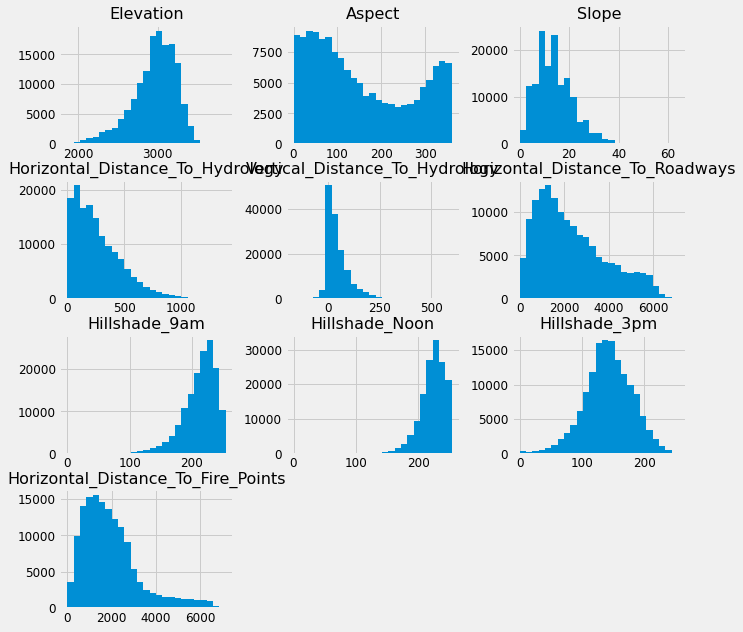

In [142]:
# Visualize distributions of each column
import matplotlib

params = {'axes.titlesize':'16',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12'}
matplotlib.rcParams.update(params)
df_subset_no_soil_no_covertype.hist(figsize=(10, 10), bins=25);

- hillshade at 3pm is about normall distributed
- slope, historizontal_distance, vertical_distance, distance_to_roadway, and horizontal_distance_to_fire_points are right skewed
- elevation, hillshde 9am and hillshade noon are left skewed

In [122]:
#prepare for heatmap
df_subset_no_soil = df_subset.drop(columns=["soil_type1","soil_type2", "soil_type3", "soil_type4", "soil_type5", "soil_type6", "soil_type7", "soil_type8", "soil_type9", 
              "soil_type10", "soil_type11","soil_type12", "soil_type13", "soil_type14", "soil_type15", "soil_type16", "soil_type17", "soil_type18", "soil_type19", "soil_type20", 
              "soil_type21","soil_type22", "soil_type23", "soil_type24", "soil_type25", "soil_type26", "soil_type27", "soil_type28", "soil_type29", "soil_type30",
              "soil_type31","soil_type32", "soil_type33", "soil_type34", "soil_type35", "soil_type36", "soil_type37", "soil_type38", "soil_type39", "soil_type40"])
df_subset_no_soil.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'cover_type'],
      dtype='object')

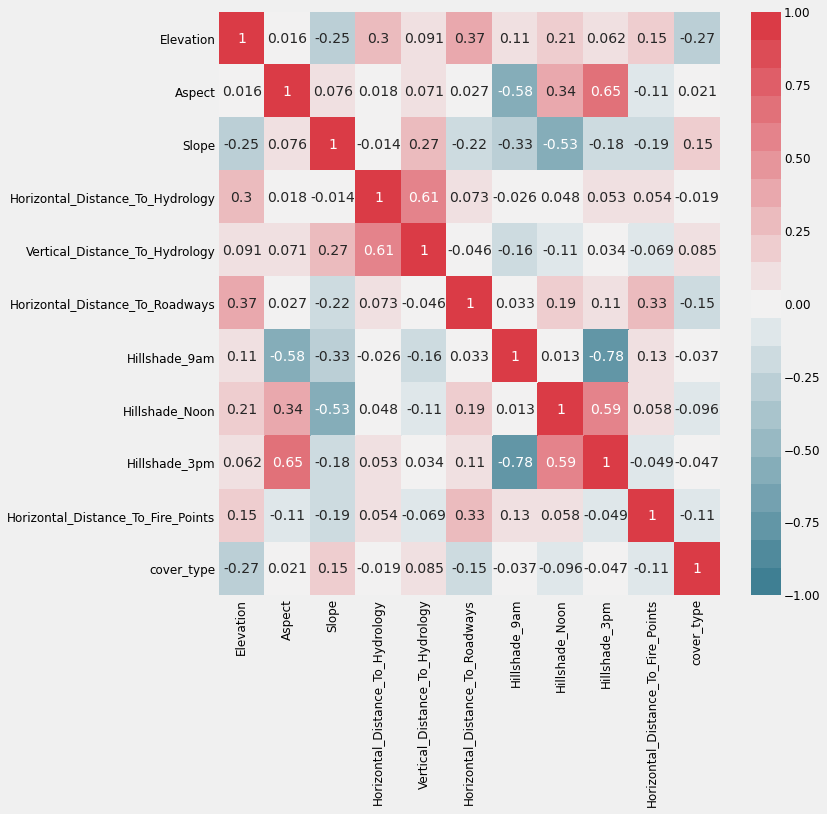

In [123]:
#correlation map without dummy coded soils 
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    df_subset_no_soil.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(220, 10, n=21),
    annot=True,
    ax=ax,
)

In [124]:
cover_type_values = df_subset.cover_type.value_counts().sort_index()
cover_type_values

1    52937
2    70781
3     9009
4      685
5     2352
6     4368
7     5121
Name: cover_type, dtype: int64

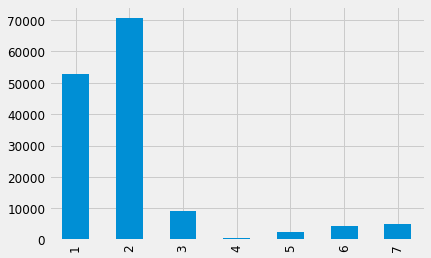

In [125]:
# number of each cover type in this dataset
cover_type_values.plot.bar();

In [126]:
df_subset_no_soil.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'cover_type'],
      dtype='object')

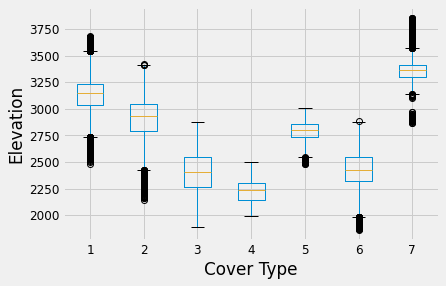

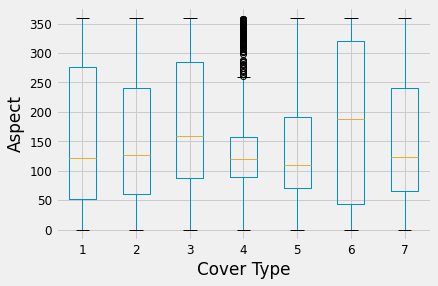

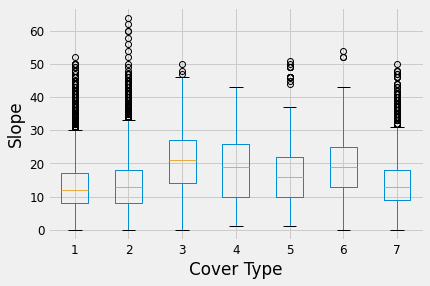

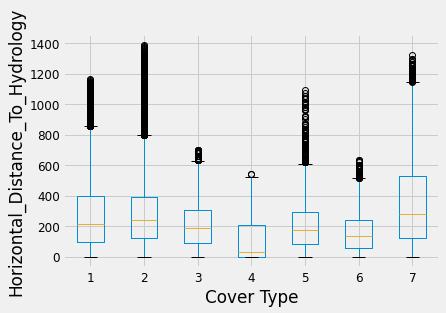

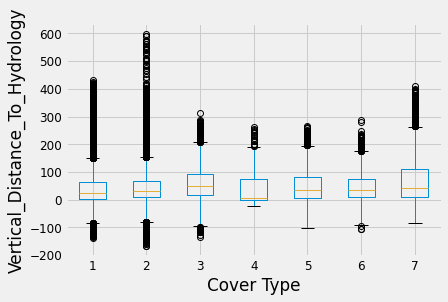

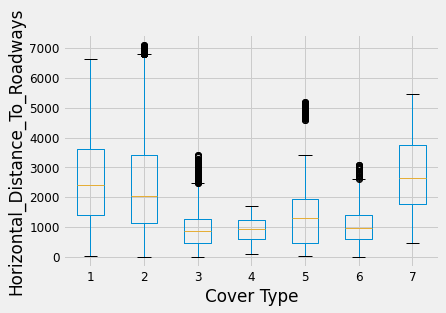

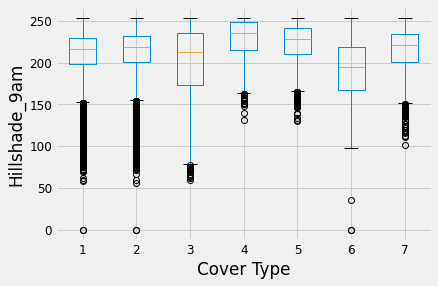

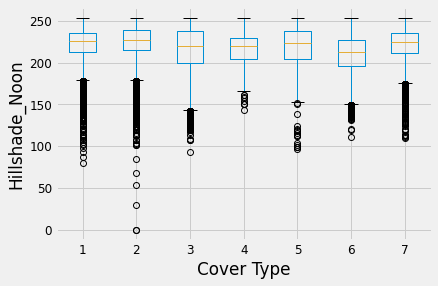

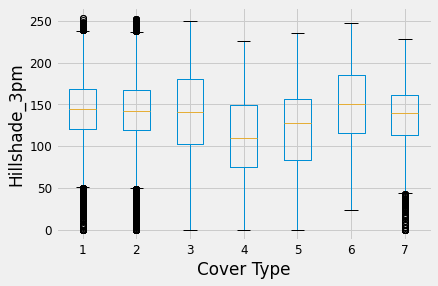

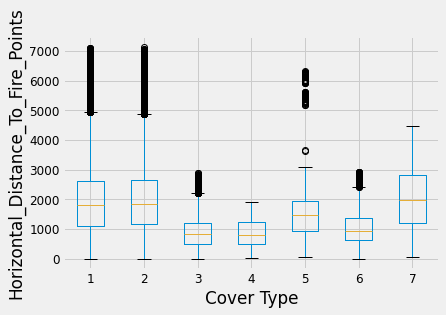

In [129]:
for feature in df_subset_no_soil_no_covertype.columns:
    ax = df_subset_no_soil.assign(index=df_subset_no_soil.groupby('cover_type').cumcount()).pivot('index','cover_type',feature).plot(kind='box')
    ax.set(xlabel="Cover Type", ylabel=feature);

In [133]:
df_soils = df_subset.drop(columns = ["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon", "Hillshade_3pm","Horizontal_Distance_To_Fire_Points"])

,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
376969,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
59897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
247100,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
111532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
522294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


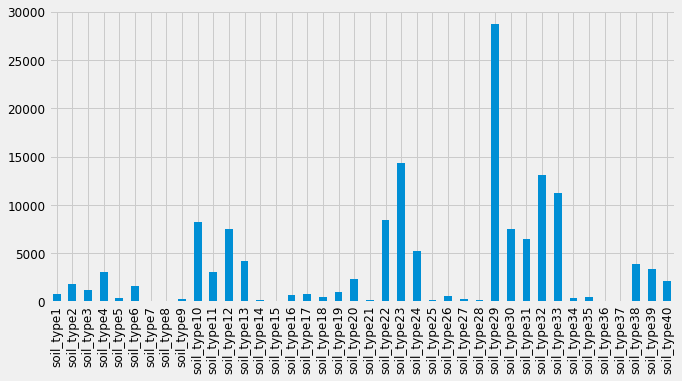

In [145]:
df_soils.drop(columns="cover_type").sum().plot.bar(figsize=(10, 5));

In [163]:
#correlation between cover type and each soil type
corr_matrix = df_soils.corr()
corr_matrix["cover_type"].sort_values(ascending=False)

cover_type     1.000000
soil_type10    0.247261
soil_type38    0.156069
soil_type39    0.152726
soil_type40    0.128803
soil_type2     0.122505
soil_type6     0.112479
soil_type4     0.099783
soil_type1     0.091265
soil_type17    0.085820
soil_type37    0.078338
soil_type35    0.077374
soil_type5     0.074238
soil_type3     0.070400
soil_type14    0.063764
soil_type11    0.036257
soil_type36    0.025523
soil_type13    0.024980
soil_type16    0.010198
soil_type18    0.007979
soil_type15    0.007416
soil_type34    0.005999
soil_type7    -0.000528
soil_type26   -0.001251
soil_type28   -0.002593
soil_type8    -0.004615
soil_type9    -0.005321
soil_type25   -0.006800
soil_type30   -0.008664
soil_type27   -0.015103
soil_type12   -0.023970
soil_type21   -0.025360
soil_type20   -0.028178
soil_type19   -0.038575
soil_type33   -0.062289
soil_type31   -0.065436
soil_type24   -0.067314
soil_type32   -0.077088
soil_type29   -0.126166
soil_type23   -0.133407
soil_type22   -0.142522
Name: cover_type

#### trends in the data
- cover type does not seem strongly correlated with any particular soil type
- soil type 29 is significantly more frequent than the other soil types
- cover type does not seem strongly correlated with any particular feature as seen in the correlation map
- As shown in the box plots, elevation has an "influence" on cover type

---

## Conclusions

**Shortcomings of the data**
- Aspect, elevation, and slope and too closely related (aspect and slope is calculated from elevation models usually)
- cover types 1 and 2 are much more frequent while the others are not that frequent
- some soil types are much more frequent while the others are not that frequent


**Any assumptions that are needed to make in light of those shortcomings**
- maybe only keep either aspect or elevation or slope


**Five things to try as ways to improve the model**
- remove some features 
- increase number of iterations in the model (from 1000)
- try k-fold cross validation using grid search cv
- try decision tree classification
- try random forest


**What the most appropriate metric for evaluating the models will be**
- Classification Accuracy:
    - number of correct predictions divided by the total number of predictions, multiplied by 100. 
- Precision: 
    - useful when class distribution is imbalanced (as in this model) 
    - defined as: Precision= True_Positive/ (True_Positive+ False_Positive)
- Recall 
    - defined as the fraction of samples from a class which are correctly predicted by the model
- F1-score
    - probably would make Fb higher to give more preference to precision
- Sensitivity and Specificity
- ROC and AUC curves

---

## Push to gihub

In [39]:
!git add "forest_cover_data.ipynb"

In [41]:
!git commit -m "first commit"

[master 5d43242] first commit
 1 file changed, 869 insertions(+)
 create mode 100644 forest_cover/forest_cover_data.ipynb


In [42]:
!git push

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1013.79 KiB | 14.48 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To https://git.generalassemb.ly/fachiappetta/final_project_proposal.git
   20aac36..5d43242  master -> master
